In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy

Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): apache-2.0


In [8]:
!unzip /content/best-alzheimer-mri-dataset-99-accuracy.zip

Streaming output truncated to the last 5000 lines.
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1106).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1107).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1108).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1109).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (111).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1110).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1111).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1112).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1113).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1114).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1115).jpg  
  inflating: Combined Dataset/train/No Impairment/NoImpairment (1116).jpg  
  inflating: Combined Dataset/train/No

In [9]:
import tensorflow as tf

# List all physical GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    try:
        # Set memory growth to prevent TensorFlow from using all GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth set successfully.")
    except RuntimeError as e:
        print("Error setting GPU memory growth:", e)
else:
    print("No GPU found. Using CPU instead.")


Num GPUs Available:  1
GPU memory growth set successfully.


Available GPUs: 1
TensorFlow Version: 2.18.0

Checking dataset...
Detected Classes: ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
Mild Impairment: 2560 images
Moderate Impairment: 2560 images
No Impairment: 2560 images
Very Mild Impairment: 2560 images
Total image count: 10240

Sample images:


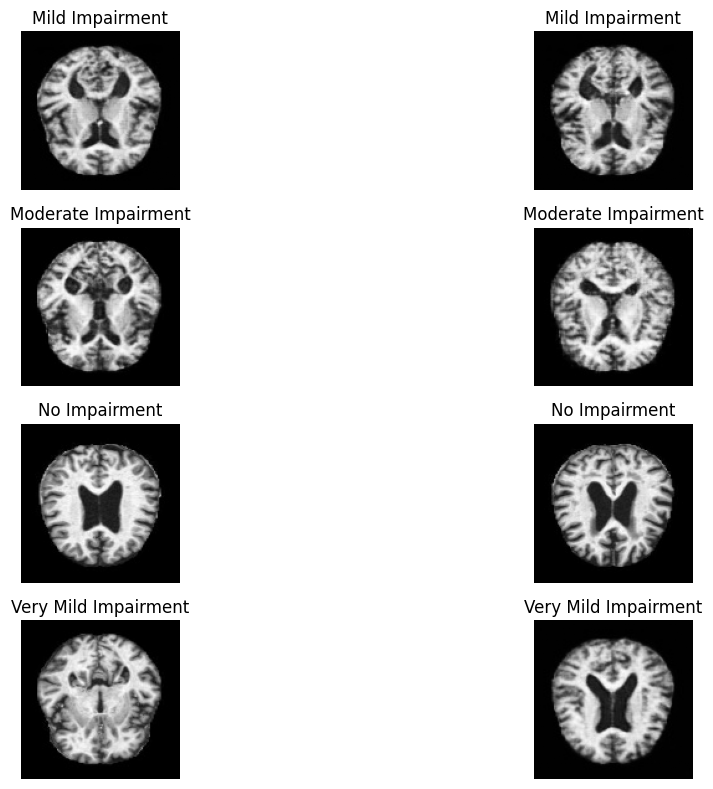


Class Weights: {0: 1.0, 1: 1.0, 2: 2.0, 3: 7.0}
Found 8192 images belonging to 4 classes.
Found 2048 images belonging to 4 classes.
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet169 (Functional)        │ (None, 8, 8, 1664)     │    12,642,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1664)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1664)           │         6,656 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,704,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,011,658 (57.26 MB)

 Trainable params: 7,676,298 (29.28 MB)

 Non-trainable params: 7,335,360 (27.98 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3888 - auc: 0.6943 - loss: 2.8375

512/512 ━━━━━━━━━━━━━━━━━━━━ 216s 194ms/step - accuracy: 0.3890 - auc: 0.6945 - loss: 2.8364 - val_accuracy: 0.5645 - val_auc: 0.8447 - val_loss: 0.8668 - learning_rate: 2.0000e-04
Epoch 2/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6610 - auc: 0.9068 - loss: 1.6157

512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.6610 - auc: 0.9068 - loss: 1.6156 - val_accuracy: 0.6597 - val_auc: 0.8747 - val_loss: 0.6692 - learning_rate: 2.0000e-04
Epoch 3/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 82s 160ms/step - accuracy: 0.7303 - auc: 0.9324 - loss: 1.3478 - val_accuracy: 0.6509 - val_auc: 0.8783 - val_loss: 0.7324 - learning_rate: 2.0000e-04
Epoch 4/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7462 - auc: 0.9421 - loss: 1.2452

512/512 ━━━━━━━━━━━━━━━━━━━━ 84s 165ms/step - accuracy: 0.7462 - auc: 0.9421 - loss: 1.2453 - val_accuracy: 0.6753 - val_auc: 0.8799 - val_loss: 0.6832 - learning_rate: 2.0000e-04
Epoch 5/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7769 - auc: 0.9547 - loss: 1.1009

512/512 ━━━━━━━━━━━━━━━━━━━━ 85s 166ms/step - accuracy: 0.7769 - auc: 0.9547 - loss: 1.1009 - val_accuracy: 0.6865 - val_auc: 0.8914 - val_loss: 0.6580 - learning_rate: 2.0000e-04
Epoch 6/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.7874 - auc: 0.9587 - loss: 1.0375

512/512 ━━━━━━━━━━━━━━━━━━━━ 87s 170ms/step - accuracy: 0.7874 - auc: 0.9587 - loss: 1.0376 - val_accuracy: 0.7510 - val_auc: 0.9124 - val_loss: 0.6468 - learning_rate: 2.0000e-04
Epoch 7/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 86s 167ms/step - accuracy: 0.7959 - auc: 0.9607 - loss: 0.9960 - val_accuracy: 0.7236 - val_auc: 0.8927 - val_loss: 0.7839 - learning_rate: 2.0000e-04
Epoch 8/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.7882 - auc: 0.9590 - loss: 1.0587 - val_accuracy: 0.7114 - val_auc: 0.8959 - val_loss: 0.6620 - learning_rate: 2.0000e-04
Epoch 9/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.8193 - auc: 0.9693 - loss: 0.9018 - val_accuracy: 0.7432 - val_auc: 0.9095 - val_loss: 0.6106 - learning_rate: 2.0000e-04
Epoch 10/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.8169 - auc: 0.9681 - loss: 0.9154 - val_accuracy: 0.7490 - val_auc: 0.9138 - val_loss: 0.8201 - learning_rate: 2.0000e-04
Epoch 11/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step

512/512 ━━━━━━━━━━━━━━━━━━━━ 87s 170ms/step - accuracy: 0.8589 - auc: 0.9795 - loss: 0.6853 - val_accuracy: 0.7524 - val_auc: 0.9174 - val_loss: 0.6464 - learning_rate: 2.0000e-04
Epoch 15/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.8665 - auc: 0.9822 - loss: 0.6418 - val_accuracy: 0.7065 - val_auc: 0.9156 - val_loss: 0.7530 - learning_rate: 2.0000e-04
Epoch 16/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.8807 - auc: 0.9830 - loss: 0.6355

512/512 ━━━━━━━━━━━━━━━━━━━━ 87s 169ms/step - accuracy: 0.8807 - auc: 0.9830 - loss: 0.6354 - val_accuracy: 0.7671 - val_auc: 0.9314 - val_loss: 0.6531 - learning_rate: 2.0000e-04
Epoch 17/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.8865 - auc: 0.9858 - loss: 0.5974 - val_accuracy: 0.7383 - val_auc: 0.9138 - val_loss: 0.7178 - learning_rate: 2.0000e-04
Epoch 18/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.8931 - auc: 0.9862 - loss: 0.5383 - val_accuracy: 0.7383 - val_auc: 0.9035 - val_loss: 0.8910 - learning_rate: 2.0000e-04
Epoch 19/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.8987 - auc: 0.9889 - loss: 0.5065 - val_accuracy: 0.7124 - val_auc: 0.8909 - val_loss: 1.0811 - learning_rate: 2.0000e-04
Epoch 20/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9056 - auc: 0.9881 - loss: 0.4958

512/512 ━━━━━━━━━━━━━━━━━━━━ 84s 165ms/step - accuracy: 0.9056 - auc: 0.9881 - loss: 0.4957 - val_accuracy: 0.7910 - val_auc: 0.9305 - val_loss: 0.6565 - learning_rate: 1.0000e-04
Epoch 21/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9203 - auc: 0.9930 - loss: 0.3745

512/512 ━━━━━━━━━━━━━━━━━━━━ 141s 163ms/step - accuracy: 0.9203 - auc: 0.9930 - loss: 0.3746 - val_accuracy: 0.8022 - val_auc: 0.9376 - val_loss: 0.6842 - learning_rate: 1.0000e-04
Epoch 22/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.9355 - auc: 0.9948 - loss: 0.3251 - val_accuracy: 0.7939 - val_auc: 0.9246 - val_loss: 0.8485 - learning_rate: 1.0000e-04
Epoch 23/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.9415 - auc: 0.9956 - loss: 0.3137 - val_accuracy: 0.7881 - val_auc: 0.9253 - val_loss: 0.8161 - learning_rate: 1.0000e-04
Epoch 24/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 85s 166ms/step - accuracy: 0.9411 - auc: 0.9941 - loss: 0.3198 - val_accuracy: 0.7759 - val_auc: 0.9246 - val_loss: 0.8627 - learning_rate: 1.0000e-04
Epoch 25/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9393 - auc: 0.9950 - loss: 0.2938

512/512 ━━━━━━━━━━━━━━━━━━━━ 85s 166ms/step - accuracy: 0.9393 - auc: 0.9950 - loss: 0.2938 - val_accuracy: 0.8169 - val_auc: 0.9390 - val_loss: 0.6576 - learning_rate: 1.0000e-04
Epoch 26/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.9423 - auc: 0.9948 - loss: 0.3112 - val_accuracy: 0.8115 - val_auc: 0.9304 - val_loss: 0.8242 - learning_rate: 1.0000e-04
Epoch 27/40
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.9567 - auc: 0.9978 - loss: 0.2107 - val_accuracy: 0.7969 - val_auc: 0.9287 - val_loss: 0.8227 - learning_rate: 5.0000e-05


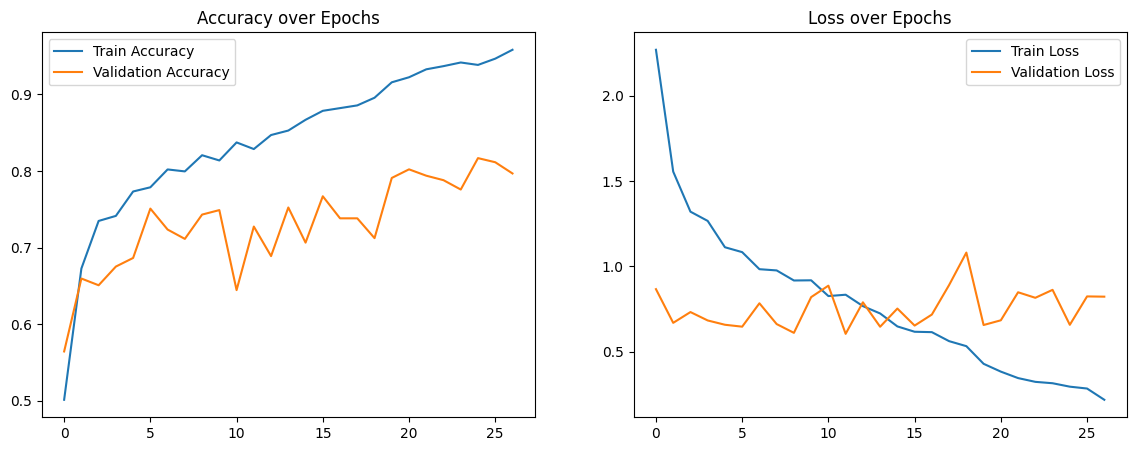


Evaluating model...
128/128 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step


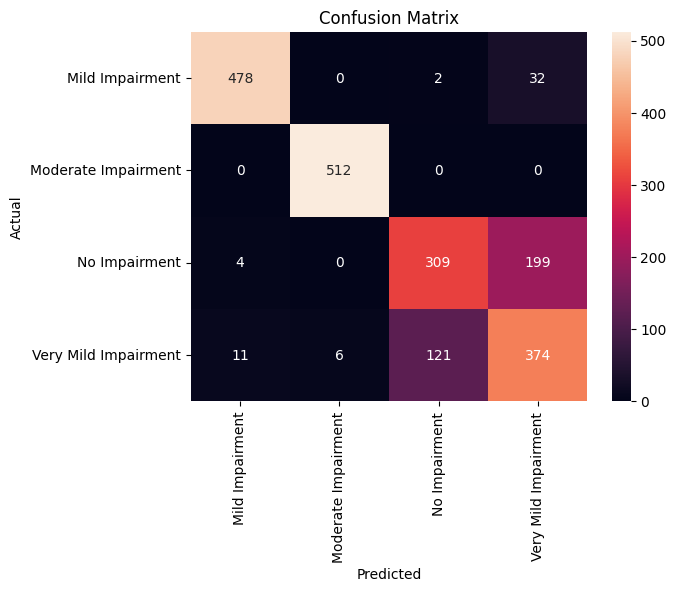

Classification Report:

                      precision    recall  f1-score   support

     Mild Impairment       0.97      0.93      0.95       512
 Moderate Impairment       0.99      1.00      0.99       512
       No Impairment       0.72      0.60      0.65       512
Very Mild Impairment       0.62      0.73      0.67       512

            accuracy                           0.82      2048
           macro avg       0.82      0.82      0.82      2048
        weighted avg       0.82      0.82      0.82      2048



In [12]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Check GPU availability
print("Available GPUs:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow Version:", tf.__version__)

# Dataset extraction
def unzip_dataset(zip_filepath, destination_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as archive:
        archive.extractall(destination_dir)
    print(f"Dataset successfully extracted to {destination_dir}")

# Dataset structure exploration
def analyze_dataset_structure(root_path):
    try:
        categories = sorted([d for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))])
        if not categories:
            print(f"No valid subfolders found in {root_path}")
            return None, None

        print("Detected Classes:", categories)
        total_images = 0
        image_distribution = {}

        for category in categories:
            category_path = os.path.join(root_path, category)
            images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            image_count = len(images)
            image_distribution[category] = image_count
            total_images += image_count
            print(f"{category}: {image_count} images")
        print(f"Total image count: {total_images}")
        return categories, image_distribution
    except Exception as err:
        print(f"Error reading dataset: {str(err)}")
        return None, None

# Display sample images
def show_sample_images(root_path, class_list, samples_per_class=2):
    plt.figure(figsize=(14, 8))
    for i, label in enumerate(class_list):
        path = os.path.join(root_path, label)
        sample_files = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:samples_per_class]
        for j, file in enumerate(sample_files):
            img = plt.imread(os.path.join(path, file))
            plt.subplot(len(class_list), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"{label}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Model creation
def build_alzheimers_model(input_dims=(256, 256, 1), total_classes=4):
    model_input = Input(shape=input_dims)
    x = tf.keras.layers.Conv2D(3, (1, 1))(model_input)  # for grayscale
    base_network = DenseNet169(weights='imagenet', include_top=False, input_shape=(input_dims[0], input_dims[1], 3))
    for layer in base_network.layers[:400]:
        layer.trainable = False
    for layer in base_network.layers[400:]:
        layer.trainable = True
    x = base_network(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    model_output = Dense(total_classes, activation='softmax')(x)

    model = Model(inputs=model_input, outputs=model_output)
    model.compile(optimizer=Adam(learning_rate=0.0002),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True)])
    return model

# Training visualization
def visualize_model_performance(training_history):
    acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.show()

# Model evaluation
def assess_model_performance(model, test_data, labels):
    predictions = model.predict(test_data)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_data.labels, axis=1) if len(test_data.labels.shape) > 1 else test_data.labels

    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n")
    print(classification_report(true_classes, predicted_classes, target_names=labels))

# Main execution
def run_pipeline():
    archive_file = '/content/best-alzheimer-mri-dataset-99-accuracy.zip'
    output_dir = '/content'
    dataset_dir = os.path.join(output_dir, '/content/Combined Dataset/train')

    if not os.path.exists(dataset_dir):
        unzip_dataset(archive_file, output_dir)

    print("\nChecking dataset...")
    classes, distribution = analyze_dataset_structure(dataset_dir)
    if not classes:
        return

    print("\nSample images:")
    show_sample_images(dataset_dir, classes)

    class_weights_map = {i: 1.0 for i in range(len(classes))}
    for name, idx in zip(classes, range(len(classes))):
        if "Very Mild Impairment" in name:
            class_weights_map[idx] = 7.0
        elif "No Impairment" in name:
            class_weights_map[idx] = 2.0

    print(f"\nClass Weights: {class_weights_map}")

    img_dim = (256, 256)
    batch_sz = 16

    train_augment = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.15,
        brightness_range=[0.9, 1.1],
        horizontal_flip=True,
        fill_mode='constant',
        cval=0,
        validation_split=0.2
    )

    test_augment = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    training_set = train_augment.flow_from_directory(
        dataset_dir,
        target_size=img_dim,
        batch_size=batch_sz,
        class_mode='categorical',
        color_mode='grayscale',
        subset='training',
        shuffle=True
    )

    validation_set = test_augment.flow_from_directory(
        dataset_dir,
        target_size=img_dim,
        batch_size=batch_sz,
        class_mode='categorical',
        color_mode='grayscale',
        subset='validation',
        shuffle=False
    )

    model = build_alzheimers_model(input_dims=(img_dim[0], img_dim[1], 1), total_classes=len(classes))
    model.summary()

    callbacks = [
        ModelCheckpoint("alz_model_best.h5", monitor="val_accuracy", save_best_only=True, mode="max"),
        EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=7, min_lr=1e-7)
    ]

    history = model.fit(
        training_set,
        validation_data=validation_set,
        epochs=40,
        class_weight=class_weights_map,
        callbacks=callbacks
    )

    visualize_model_performance(history)

    print("\nEvaluating model...")
    model.load_weights("alz_model_best.h5")
    assess_model_performance(model, validation_set, list(training_set.class_indices.keys()))
    model.save("alzheimers_final_model.h5")

# Run the updated pipeline
run_pipeline()
